# Bag of Words

Bag of Visual Words is an extention to the NLP algorithm Bag of Words used for image classification.
![image](bovw_image_example.jpg "")

## Building a bag of visual words
Building a bag of visual words can be broken down into a three-step process:

### Step 1: Feature extraction
#### Overview
![Image](bovw_multiple_feature_vectors.png "")

#### SIFT(Scale Invariant Feature Transform).
These features do not change with:
* Object position/pose
* Scale
* Illumination
* Minor image artifacts/noise/blur

#### The algorithm
* Constructing a scale space: This is the initial preparation. Create internal representations of the original image to ensure scale invariance. This is done by generating a "scale space".

* LoG Approximation : The Laplacian of Gaussian is great for finding interesting points (or key points) in an image. But it's computationally expensive. So approximated using the representation created earlier.

* Finding keypoints: With the super fast approximation, now try to find key points. These are maxima and minima in the Difference of Gaussian image we calculate in step 2

* Get rid of bad key points:  Edges and low contrast regions are bad keypoints. Eliminating these makes the algorithm efficient and robust. A technique similar to the Harris Corner Detector is used here.

* Assigning an orientation to the keypoints: An orientation is calculated for each key point. Any further calculations are done relative to this orientation. This effectively cancels out the effect of orientation, making it rotation invariant.

* Generate SIFT features: Finally, with scale and rotation invariance in place, one more representation is generated.This helps uniquely identify features.** Each feature extracted from the image is a 128 dimensional vector**

Using SIFT, detect and compute features inside each image. SIFT returns us a m×128 dimension array, where m is the number of features extrapolated. Similarly, for multiple images,
![](sift.png)
wher features_i is an array of dimension m X 128

#### Code Snippet to get sift features using OpenCV
    import cv2
    sift_obj = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift_obj.detectAndCompute(image, None)

### Step 2: Vocabulaory construction/Clustering
Vocabulary construction is normally accomplished via the k-means clustering algorithm where one cluster the feature vectors obtained from Step 1.

#### Code Snippet for clustering feature vectors using sklearn:
    from sklearn.cluster import KMeans
    kmeans_obj = KMeans(n_clusters = n_clusters)
    kmeans_cls = kmeans_obj.fit_predict(descriptor_numpy_vstack) 
where shape of "descriptor_numpy_vstack" is n * sum(m_i) * 128

and n is total number of images

m is the number of features extrapolated per image.

** This step was the most time consuming process.Approx 90 mins on Google Colab Cloud VM. **

### Step 3: Vector quantization.
From Step 2,get the set of nearest neighbor labels and build a histogram of length k (the number of clusters generated from k-means), where the i‘th value in the histogram is the frequency of the i‘th visual word. 

So what we have finally is a collection of possible visual words, which, one can then quantify and represent each image as a histogram which simply counts the number of times each visual word appears. This histogram is our actual bag of visual words:
![image](bovw_visual_word_counts.jpg "")

#### Code snippet for generating histogram : 
![](hist.png)


## ** After above steps the histogram for each image was exported into a ".npy" file. This way, feature extraction for same training set is not need everytime when one wants to experiment with the classifier. **


# Import histograms from the ".npy" file

In [49]:
hist_ = np.load("../micro_features_class.npy")
hist_.shape

(360, 101)

In [2]:
from sklearn.preprocessing import StandardScaler


## Normalise the histograms

In [5]:
scale = StandardScaler().fit(hist_)
hist_std = scale.transform(hist_)

In [122]:
hist_std

array([[ 1.01120615,  0.23192707, -0.05874369, ..., -0.19385798,
         3.25433553, -1.22474487],
       [ 0.57591167, -0.34191311, -0.05874369, ..., -0.5436769 ,
         1.28671723, -1.22474487],
       [-1.19087181, -1.05921334, -0.68867599, ..., -1.03925371,
        -0.56262892, -1.22474487],
       ..., 
       [-0.26907174, -0.79620325,  2.60497006, ...,  0.41832513,
        -0.48736483,  1.22474487],
       [ 1.03681171,  0.68621722, -0.11273788, ..., -0.9226474 ,
        -0.42285276,  1.22474487],
       [ 1.95861178, -0.53319317, -0.22072628, ...,  2.40063234,
         0.1470039 ,  1.22474487]])

In [123]:
bov.train_labels

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

# Classification

In [124]:
hist_std

array([[ 1.01120615,  0.23192707, -0.05874369, ..., -0.19385798,
         3.25433553, -1.22474487],
       [ 0.57591167, -0.34191311, -0.05874369, ..., -0.5436769 ,
         1.28671723, -1.22474487],
       [-1.19087181, -1.05921334, -0.68867599, ..., -1.03925371,
        -0.56262892, -1.22474487],
       ..., 
       [-0.26907174, -0.79620325,  2.60497006, ...,  0.41832513,
        -0.48736483,  1.22474487],
       [ 1.03681171,  0.68621722, -0.11273788, ..., -0.9226474 ,
        -0.42285276,  1.22474487],
       [ 1.95861178, -0.53319317, -0.22072628, ...,  2.40063234,
         0.1470039 ,  1.22474487]])

In [7]:
import pandas as pd
import numpy as np

In [8]:
df2 = pd.DataFrame(data=hist_)
numpy_matrix = df2.as_matrix()

numpy_matrix # last column represent the class of each image histogram
df2
#np.save("micro_features_class",numpy_matrix)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,86.0,58.0,37.0,134.0,143.0,165.0,16.0,79.0,189.0,60.0,...,85.0,97.0,9.0,11.0,77.0,32.0,169.0,29.0,355.0,0.0
1,69.0,34.0,37.0,61.0,125.0,134.0,41.0,42.0,143.0,52.0,...,58.0,125.0,63.0,18.0,60.0,33.0,80.0,17.0,172.0,0.0
2,0.0,4.0,2.0,0.0,1.0,0.0,7.0,1.0,0.0,1.0,...,2.0,0.0,1.0,2.0,5.0,0.0,2.0,0.0,0.0,0.0
3,102.0,77.0,22.0,107.0,173.0,155.0,22.0,64.0,136.0,61.0,...,96.0,82.0,1.0,10.0,80.0,36.0,182.0,20.0,353.0,0.0
4,73.0,81.0,28.0,62.0,141.0,124.0,30.0,59.0,105.0,85.0,...,81.0,69.0,3.0,8.0,67.0,37.0,108.0,17.0,215.0,0.0
5,37.0,21.0,19.0,15.0,59.0,35.0,24.0,52.0,75.0,22.0,...,19.0,65.0,12.0,8.0,14.0,6.0,20.0,9.0,41.0,0.0
6,49.0,65.0,28.0,48.0,75.0,43.0,37.0,85.0,99.0,38.0,...,46.0,83.0,55.0,31.0,44.0,12.0,59.0,54.0,91.0,0.0
7,33.0,25.0,3.0,29.0,76.0,28.0,24.0,55.0,62.0,39.0,...,22.0,83.0,11.0,25.0,23.0,30.0,43.0,8.0,62.0,0.0
8,17.0,21.0,7.0,17.0,46.0,24.0,9.0,31.0,70.0,17.0,...,15.0,110.0,7.0,9.0,11.0,7.0,24.0,5.0,114.0,0.0
9,53.0,57.0,16.0,66.0,146.0,107.0,14.0,53.0,102.0,68.0,...,73.0,57.0,2.0,8.0,44.0,30.0,144.0,19.0,356.0,0.0


In [9]:
data = numpy_matrix

## Construct the training set for classification

In [10]:
train_data  = np.array(data[:100,:])
train_data  = np.vstack((train_data, data[120:220,:]))
train_data  = np.vstack((train_data, data[240:340,:]))
train_data.shape

(300, 101)

## Construct the testing set for classification

In [11]:
test_data  = np.array(data[100:120,:])
test_data  = np.vstack((test_data, data[220:240,:]))
test_data  = np.vstack((test_data, data[340:360,:]))
test_data.shape

(60, 101)

In [12]:
df2

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,86.0,58.0,37.0,134.0,143.0,165.0,16.0,79.0,189.0,60.0,...,85.0,97.0,9.0,11.0,77.0,32.0,169.0,29.0,355.0,0.0
1,69.0,34.0,37.0,61.0,125.0,134.0,41.0,42.0,143.0,52.0,...,58.0,125.0,63.0,18.0,60.0,33.0,80.0,17.0,172.0,0.0
2,0.0,4.0,2.0,0.0,1.0,0.0,7.0,1.0,0.0,1.0,...,2.0,0.0,1.0,2.0,5.0,0.0,2.0,0.0,0.0,0.0
3,102.0,77.0,22.0,107.0,173.0,155.0,22.0,64.0,136.0,61.0,...,96.0,82.0,1.0,10.0,80.0,36.0,182.0,20.0,353.0,0.0
4,73.0,81.0,28.0,62.0,141.0,124.0,30.0,59.0,105.0,85.0,...,81.0,69.0,3.0,8.0,67.0,37.0,108.0,17.0,215.0,0.0
5,37.0,21.0,19.0,15.0,59.0,35.0,24.0,52.0,75.0,22.0,...,19.0,65.0,12.0,8.0,14.0,6.0,20.0,9.0,41.0,0.0
6,49.0,65.0,28.0,48.0,75.0,43.0,37.0,85.0,99.0,38.0,...,46.0,83.0,55.0,31.0,44.0,12.0,59.0,54.0,91.0,0.0
7,33.0,25.0,3.0,29.0,76.0,28.0,24.0,55.0,62.0,39.0,...,22.0,83.0,11.0,25.0,23.0,30.0,43.0,8.0,62.0,0.0
8,17.0,21.0,7.0,17.0,46.0,24.0,9.0,31.0,70.0,17.0,...,15.0,110.0,7.0,9.0,11.0,7.0,24.0,5.0,114.0,0.0
9,53.0,57.0,16.0,66.0,146.0,107.0,14.0,53.0,102.0,68.0,...,73.0,57.0,2.0,8.0,44.0,30.0,144.0,19.0,356.0,0.0


In [44]:
X = df2.iloc[:, :-1].values
Y = df2.iloc[:, -1].values

In [45]:
Y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

In [13]:
X_train = train_data[:,:-1]
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_train

array([[ 0.99743855,  0.23646234, -0.06473192, ...,  3.10730893,
        -0.16208185,  3.33006971],
       [ 0.56967731, -0.34980793, -0.06473192, ...,  0.74920563,
        -0.5155008 ,  1.33010442],
       [-1.16653005, -1.08264576, -0.67706094, ..., -1.3174467 ,
        -1.01617763, -0.54964438],
       ..., 
       [-0.38649486, -0.96050612,  1.05495541, ..., -1.02599573,
         0.57420761, -0.39664157],
       [-0.33617001, -0.10552865,  2.61202061, ...,  0.8551878 ,
        -0.86891974, -0.42942788],
       [-1.1162052 , -1.05821783,  0.1976948 , ..., -1.34394224,
        -0.69221027, -0.54964438]])

In [14]:
Y_train = train_data[:, -1]
Y_train

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [15]:
X_test = test_data[:,:-1]
scale = StandardScaler().fit(X_test)
X_test = scale.transform(X_test)
X_test

array([[-0.14827979, -0.22173249, -0.43002502, ...,  0.02093561,
         2.07677101,  0.4971511 ],
       [-0.79788652, -0.56954817, -0.72979349, ..., -0.88348265,
        -1.026396  ,  0.60762913],
       [-0.57193635, -0.48259425, -0.38720095, ...,  0.2721629 ,
        -0.74428991,  1.42114911],
       ..., 
       [-0.31774242, -0.72171753,  3.14578466, ..., -0.80811446,
         0.24308142, -0.55741184],
       [ 1.12268988,  0.62606822, -0.08743247, ...,  1.05096752,
        -1.05460661, -0.4971511 ],
       [ 2.13946561, -0.48259425, -0.21590468, ...,  0.29728563,
         2.16140284,  0.0351521 ]])

In [16]:
Y_test = test_data[:, -1]

## Using SVM for classification task

In [38]:
clf2  = SVC(kernel='rbf')

In [39]:
clf2.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
print(clf2.classes_)

[ 0.  1.  2.]


In [41]:
Y_train_pred = clf2.predict(X_train)
Y_test_pred = clf2.predict(X_test)

In [42]:
print('Correctly predicted on TRAINING SET: {}, errors:{}'.format(
    sum(Y_train==Y_train_pred),
    sum(Y_train!=Y_train_pred)))

Correctly predicted on TRAINING SET: 292, errors:8


In [43]:
print('Correctly predicted on TEST set: {}, errors:{}'.format(
    sum(Y_test==Y_test_pred),
    sum(Y_test!=Y_test_pred)))

Correctly predicted on TEST set: 59, errors:1


In [44]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [45]:
print(classification_report(Y_train,Y_train_pred))
print('Accuracy on TRAINING set: {:.2f}'.format(accuracy_score(Y_train, Y_train_pred)))

             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99       100
        1.0       1.00      0.94      0.97       100
        2.0       0.93      1.00      0.96       100

avg / total       0.98      0.97      0.97       300

Accuracy on TRAINING set: 0.97


# Accuray Evaluation on test images

In [46]:
print(classification_report(Y_test, Y_test_pred))
print('Accuracy on TEST set: {:.2f}'.format(accuracy_score(Y_test, Y_test_pred)))

             precision    recall  f1-score   support

        0.0       1.00      0.95      0.97        20
        1.0       1.00      1.00      1.00        20
        2.0       0.95      1.00      0.98        20

avg / total       0.98      0.98      0.98        60

Accuracy on TEST set: 0.98


In [27]:
print("Confused Matrix:[ TRAINING ] \n"," ".join(["{:3d}".format(int(d)) for d in clf2.classes_]),"<-- PREDICTED LABEL")
print(confusion_matrix(Y_train, Y_train_pred, labels=clf2.classes_))

Confused Matrix:[ TRAINING ] 
   0   1   2 <-- PREDICTED LABEL
[[ 98   0   2]
 [  0  94   6]
 [  0   0 100]]


In [28]:
print("Confused Matrix:[ TEST ] \n"," ".join(["{:3d}".format(int(d)) for d in clf2.classes_]),"<-- PREDICTED LABEL")
print(confusion_matrix(Y_test, Y_test_pred, labels=clf2.classes_))

Confused Matrix:[ TEST ] 
   0   1   2 <-- PREDICTED LABEL
[[19  0  1]
 [ 0 20  0]
 [ 0  0 20]]


# Analyse different section of feature Extraction and Representation

In [ ]:
des_list = []

In [ ]:
bow = BOV(no_clusters=100)
bow

In [ ]:
img = cv2.imread("images/train/pearlite/micrograph1.tif")

In [ ]:
img.shape

In [ ]:
kp, des = bow.im_helper.features(img)

In [ ]:
kp[0].__class__

In [ ]:
des.shape

In [ ]:
des_list.append(des)

In [ ]:
plt.rcParams["figure.figsize"] = 5,100
plt.imshow(des,cmap="gray")
plt.show()

# Code Demo

In [ ]:
img = cv2.imread("images/train/spheroidite/micrograph2.tif")

In [ ]:
img.shape

In [ ]:
kp, des = bow.im_helper.features(img)

In [ ]:
len(kp)

In [ ]:
des.shape

In [ ]:
des_list.append(des)

In [ ]:
plt.rcParams["figure.figsize"] = 5,200
plt.imshow(des,cmap="gray")
plt.show()

In [ ]:
des_list[0].shape

In [ ]:
vStack = np.array(des_list[0])
for remaining in des_list[1:]:
    vStack = np.vstack((vStack, remaining))
vStack.shape

In [ ]:
vStack[0]

In [ ]:
from glob import glob
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans_ret = bow.bov_helper.kmeans_obj.fit_predict(vStack)

In [ ]:
kmeans_ret[0]

In [ ]:
mega_histogram = np.array([np.zeros(100) for i in range(2)])
old_count = 0
for i in range(2):
    l = len(des_list[i])
    for j in range(l):
        idx = kmeans_ret[old_count+j]
        mega_histogram[i][idx] += 1
    old_count += l
print("Vocabulary Histogram Generated")

In [ ]:
mega_histogram[0].min()

In [ ]:
scale = StandardScaler().fit(mega_histogram)
n_mega_histogram = scale.transform(mega_histogram)

In [ ]:
mega_histogram

Plotting histogram
[ 86  58  37 134 143 165  16  79 189  60   7 234  21 124 133  11 104 141
   7 114  27  36  69 212 193  69  18 135 118  83  98 128  16 152 123 162
 190  38  18   0 111   5  40   8 110  21  22  22 108  50 419  34  83  67
 149  99  19 105  53  14 125  11  12  19 274  65 101  67  38 201  36  88
  67   4   7  51  12   0   1  98  38 170  12  92 207 253  21 204 174 276
  87  85  97   9  11  77  32 169  29 355]


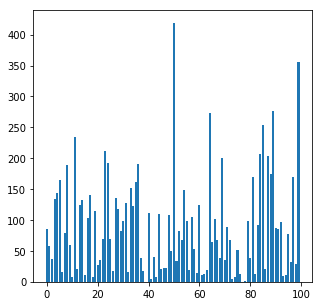

[ 19  22   4  11  64  15   9  38  74  17   7  41   2  24  33   2  17  30
  29  10   8  18   8  38  55  11   6  20  28  15  26  24  14  28  59  26
  50   5   4   0  20   0  15  16  21  14   3   5  20  10 369  18  12  14
  80  11  12  26  13   6  29   4   3  16  61  17  18  15   6  36  16  17
   9   6   3  14   3   0   4  13   7  88   0  17  36  38   6  92  34  51
  12  21  83   1   5  18  12  21   5 123]


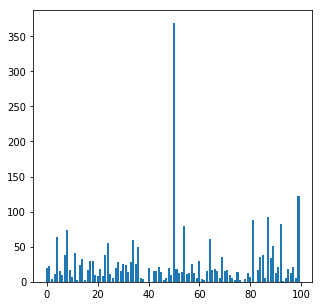

In [199]:
X_test_ = test_data[:,:-1]
X_train_ = train_data[:,:-1]

print("Plotting histogram")
vocabulary = X_train_[0]

x_scalar = np.arange(100)
y_scalar = np.array([abs(np.sum(vocabulary[h], dtype=np.int32)) for h in range(100)])

print(y_scalar)
plt.rcParams["figure.figsize"] = 5,5
plt.bar(x_scalar, y_scalar)
plt.show()

vocabulary = X_test_[1]

x_scalar = np.arange(100)
y_scalar = np.array([abs(np.sum(vocabulary[h], dtype=np.int32)) for h in range(100)])

print(y_scalar)
plt.rcParams["figure.figsize"] = 5,5
plt.bar(x_scalar, y_scalar)
plt.show()

Plotting histogram
[ 8 43  3 17 13 21 20 11  6 12  6 20 13 13  3  0 38 23 47 12 19  9 13 22 27
  8 17 47 10  9  2 32 13  5  2 51 15  5 80  1 46  9  5  0  4 16  2 23  5 20
  6 41 57 10  5  6  8 11  7 62  2  7  4 43  0  5  8 23 11 36 11  6 28 15  0
 28  5  0 81 11  9  5  6 14 17 17 12 13  9  3  9 52 12  1  9 52 15 41  8 10]


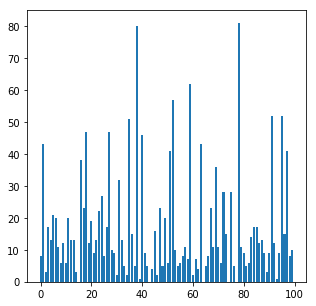

[ 25  58   7  46  21  17  31  89   8  29  37  34  34  22  22   2  43  16
  58  18  37  30  34  22  14  57  49  52  21  13  27  28  47  13  24  39
  15   3 109   1  46   3  43   1  21  39   5  41  23  68   2  57  59  35
  10  18  39  32  67  99  25  73  38  50   9  11  20  47   3  37  46  22
  49  50   2  70  52   0  68  49  46  11   2  41  16  13  67  14  17   5
  19  55  25   2  38  54  47  61  49   4]


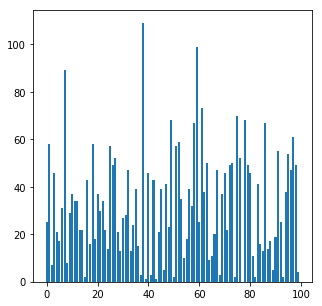

In [200]:
X_test_ = test_data[:,:-1]
X_train_ = train_data[:,:-1]

print("Plotting histogram")
vocabulary = X_train_[120]

x_scalar = np.arange(100)
y_scalar = np.array([abs(np.sum(vocabulary[h], dtype=np.int32)) for h in range(100)])

print(y_scalar)
plt.rcParams["figure.figsize"] = 5,5
plt.bar(x_scalar, y_scalar)
plt.show()

vocabulary = X_test_[20]

x_scalar = np.arange(100)
y_scalar = np.array([abs(np.sum(vocabulary[h], dtype=np.int32)) for h in range(100)])

print(y_scalar)
plt.rcParams["figure.figsize"] = 5,5
plt.bar(x_scalar, y_scalar)
plt.show()

Plotting histogram
[106 118  46  37  78  98  23  24  10  71  17  56  32 112  33  32  67  87
 137 144  32  37  42  61  46  30  20 218  90  57  30 100  23  43  26 140
  81  59  19  21 106 104  17  25  32  31  41  29  73  17  36  70  78  47
  31  58  28  81  25  29  45  29  12  62   4 128  27  46  50  81  49  42
  40  39  24  27   9  26  56   4  21  31 123  71  36  35   8  74  60   6
 142  96  18  95  21  65  47 114  13   9]


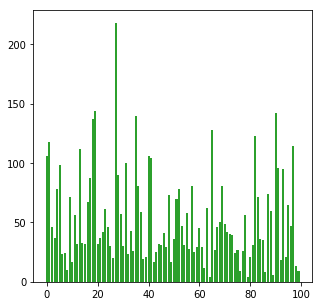

[   0    2   55    6    1   13    3    1   34    2    0    2    2    3    3
  342    5   14    4    0    2    1    0    4    3    1    2    7    5   15
    1    6    1   10    0    3    3   29    1 1131    0   23    1 1381    1
    0   52    0    1    0    9    3    2    0   11    3    0    2    1    0
    1    0    0    4    9    5   15    0   26    4    0   26    0    6 1695
    0    0  485    2    2    2   23   58    1    3    5    0   18   11    5
    1    1    1  186    0    2    0    6    4    1]


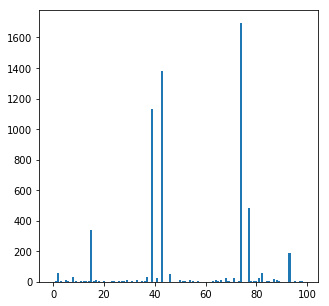

In [203]:
X_test_ = test_data[:,:-1]
X_train_ = train_data[:,:-1]

print("Plotting histogram")
vocabulary = X_train_[240]

x_scalar = np.arange(100)
y_scalar = np.array([abs(np.sum(vocabulary[h], dtype=np.int32)) for h in range(100)])

print(y_scalar)
plt.rcParams["figure.figsize"] = 5,5
plt.bar(x_scalar, y_scalar)
plt.show()

vocabulary = X_test_[40]

x_scalar = np.arange(100)
y_scalar = np.array([abs(np.sum(vocabulary[h], dtype=np.int32)) for h in range(100)])

print(y_scalar)
plt.rcParams["figure.figsize"] = 5,5
plt.bar(x_scalar, y_scalar)
plt.show()